 Analyze Times series:
 
 Plot time series (give visual feedback)

a) https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis

In [30]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pa
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
df_air = pa.read_csv(r"C:\Users\krent\OneDrive\Desktop\PythonII\PythonIIPractical\week5\AirPassengers.csv")

In [32]:
df_air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [33]:
df_air = df_air.rename(columns={"#Passengers":"Passengers"})

<Axes: >

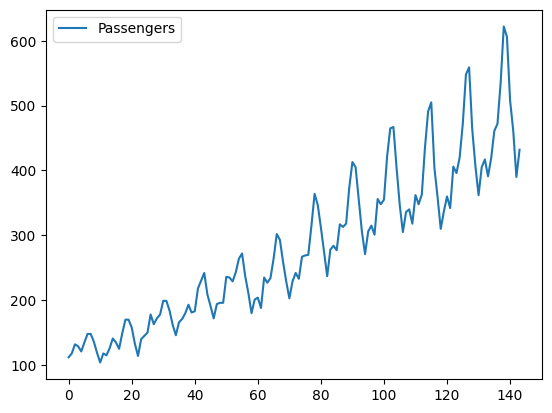

In [34]:
df_air.plot()

Caculate and plot ACF (give visual feedback)

<StemContainer object of 3 artists>

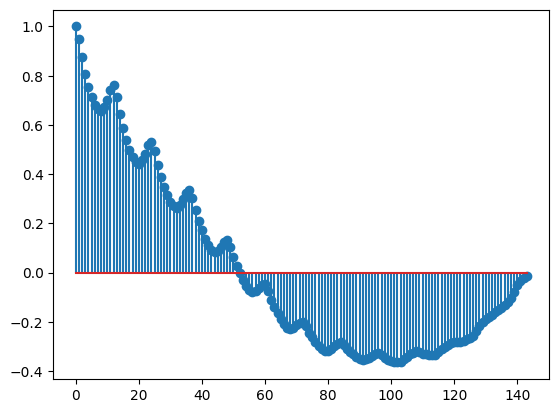

In [36]:
data = df_air["Passengers"]
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

 Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test)
 If there is the trend - remove it from the Time Series

In [37]:
test_results = adfuller(data)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  0.8153688792060457
P-Value:  0.991880243437641


In [38]:
#P-value is small - H0 hypoteses can be declined

 Check seasonality (visually and using ACF)

<StemContainer object of 3 artists>

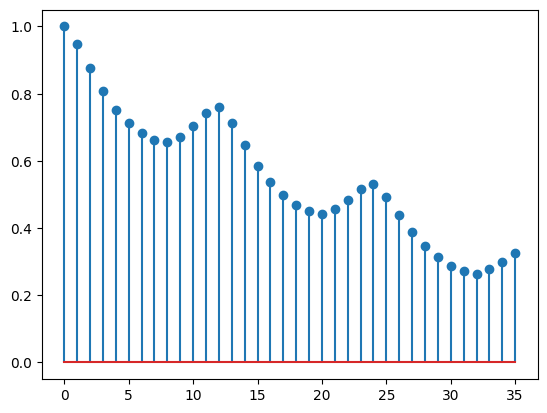

In [39]:
acf = sm.tsa.stattools.acf(data,nlags=35)
plot.stem(range(0,len(acf)),acf)

Run automatic ARIMA model determination.

Find the best model, give summary and display the results (existing time range + future)

In [40]:
model = auto_arima(data,trace=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

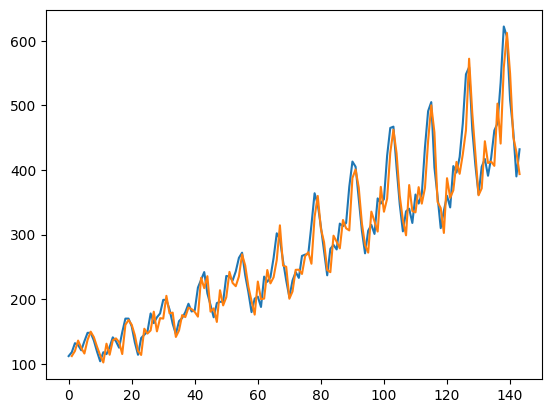

In [41]:
#ARIMA 4,3
plot.plot(data)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Tue, 18 Jul 2023   AIC                           1365.825
Time:                        15:19:56   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1728     85.616      8.458      0.000     556.369     891.976
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

b)Select your own data:

Plot time series (give visual feedback)

In [44]:
df_shampoo = pa.read_csv(r"C:\Users\krent\OneDrive\Desktop\PythonII\PythonIIPractical\sales-of-shampoo-over-a-three-ye.csv")

In [45]:
df_shampoo

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3
5,1-Jun,168.5
6,1-Jul,231.8
7,1-Aug,224.5
8,1-Sep,192.8
9,1-Oct,122.9


In [47]:
df_shampoo = df_shampoo.rename(columns={"Sales of shampoo over a three year period":"Sales"})

<Axes: >

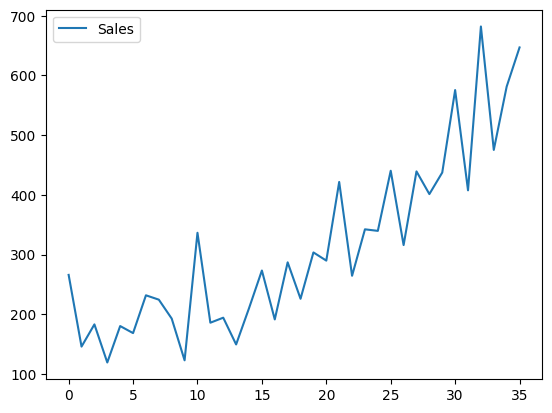

In [48]:
df_shampoo.plot()

Caculate and plot ACF (give visual feedback)

<StemContainer object of 3 artists>

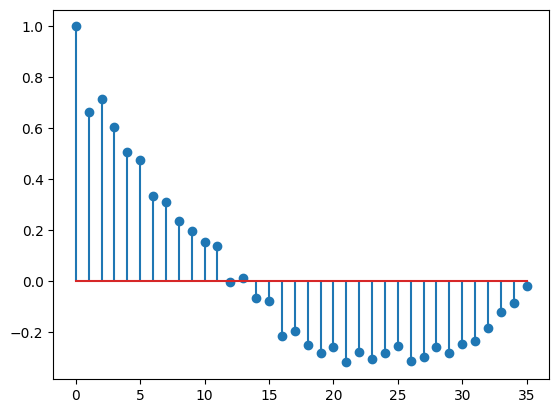

In [51]:
data = df_shampoo["Sales"]
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test) If there is the trend - remove it from the Time Series

In [52]:
test_results = adfuller(data)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  3.0601420836411792
P-Value:  1.0


In [53]:
#P-value is small - H0 hypoteses can be declined

Check seasonality (visually and using ACF)

<StemContainer object of 3 artists>

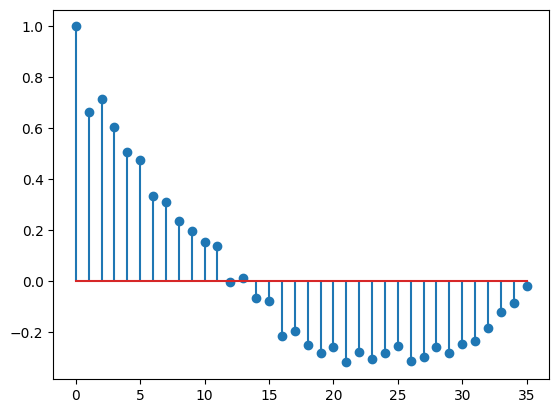

In [55]:
acf = sm.tsa.stattools.acf(data,nlags=35)
plot.stem(range(0,len(acf)),acf)

Run automatic ARIMA model determination.

Find the best model, give summary and display the results (existing time range + future)

In [56]:
model = auto_arima(data,trace=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best 

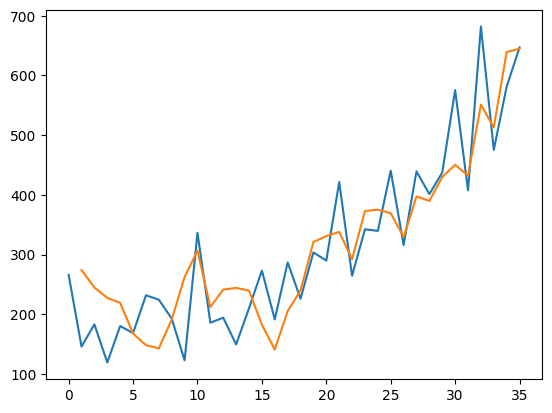

In [57]:
#ARIMA 1,2
plot.plot(data)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.731
Date:                Tue, 18 Jul 2023   AIC                            401.463
Time:                        15:43:29   BIC                            409.240
Sample:                             0   HQIC                           404.147
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3017      6.173      1.507      0.132      -2.798      21.401
ar.L1          0.0891      0.314      0.284      0.776      -0.525       0.704
ma.L1         -1.3869      0.315     -4.403      0.000      -2.004      -0.770
ma.L2          0.9423      0.449      2.098      0.036       0.062       1.823
sigma2      3695.9786   1457.382      2.536      0.011     839.562    6552.395
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.64   Prob(JB):                         0.67
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""